<a href="https://colab.research.google.com/github/MJMortensonWarwick/ADA2425/blob/main/6_1_logistic_regression_in_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression in PyTorch
This tutorial will first show you setting up a logistic regression, with a dataset we have used previously, in PyTorch. The aim is to give you a feel for how PyTorch works.

We'll start with the stuff you've previously seen:

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
data = datasets.load_breast_cancer()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

The above code takes the sklearn breast_cancer dataset, splits into train and test and then finally scales the data. Now we just need to convert this data into PyTorch's required datatype _tensors_ (see 6\_X if you want to understand more about tensors).

In [3]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Print an example
print(X_train[:5])

tensor([[-1.4408, -0.4353, -1.3621, -1.1391,  0.7806,  0.7189,  2.8231, -0.1191,
          1.0927,  2.4582, -0.2638, -0.0161, -0.4704, -0.4748,  0.8384,  3.2510,
          8.4389,  3.3920,  2.6212,  2.0612, -1.2329, -0.4763, -1.2479, -0.9740,
          0.7229,  1.1867,  4.6728,  0.9320,  2.0972,  1.8865],
        [ 1.9741,  1.7330,  2.0917,  1.8520,  1.3198,  3.4263,  2.0131,  2.6650,
          2.1270,  1.5584,  0.8053, -0.8127,  0.7520,  0.8772, -0.8961,  1.1812,
          0.1836,  0.6006, -0.3177,  0.5296,  2.1733,  1.3113,  2.0816,  2.1374,
          0.7619,  3.2656,  1.9286,  2.6989,  1.8912,  2.4978],
        [-1.4000, -1.2496, -1.3452, -1.1098, -1.3326, -0.3074, -0.3656, -0.6965,
          1.9303,  0.9544,  0.0275,  1.9631, -0.1210, -0.3508,  0.5728,  0.7395,
          0.3207,  0.5895,  2.6150,  0.7189, -1.2953, -1.0408, -1.2452, -0.9997,
         -1.4387, -0.5486, -0.6449, -0.9702,  0.5976,  0.0579],
        [-0.9818,  1.4162, -0.9826, -0.8669,  0.0594, -0.5968, -0.8202, -0.8451

Now we have sorted out the data, we can specify our model. Note this is much more customisable in PyTorch, but that also means the code is more complicated:

In [4]:
# Define logistic regression model
class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

This code defines a custom class we create called _LogisticRegression_, which inherits from PyTorch's _nn.Module_ (i.e. it uses PyTorch's nn.Module as a template). This is the standard way to define models in PyTorch. The class encapsulates the structure and behavior of our logistic regression model.
<br><br><br>
__Step-by-step explanation:__

1. _class LogisticRegression(nn.Module)_: This line defines the class and indicates that it's a subclass of nn.Module.
2. _def \_\_init\__(self, input_dim)_: This is the constructor of the class (the thing that builds objects of this class). It takes the input_dim as an argument, which represents the number of features in the input data.
3. _super(LogisticRegression, self).\_\_init\__()_: This line initializes the parent class (nn.Module), ensuring that all necessary setup is done. I.e. if we create an object of this class, then this step builds the actual object according to our template we are defining.
4. _self.linear = nn.Linear(input_dim, 1)_: This line creates a linear layer, which is the core component of our logistic regression model. It takes input_dim features as input and produces a single output (for binary classification).
5. _def forward(self, x)_: This method defines the forward pass of the model, which is how input data is transformed into predictions.
6. _return torch.sigmoid(self.linear(x))_: This line performs the following steps (steps 7 and 8):
7. _self.linear(x)_: Applies the linear layer to the input x.
8. _torch.sigmoid(...)_: Applies the sigmoid function to the output of the linear layer, producing a probability between 0 and 1. This probability represents the model's prediction for the given input.
<br><br><br>
Now we have defined the class (our model specification essentially), we can create an object of this class. As per the _def \__init\__(self, input\_dim)_ command above (step 2), when we build an object we need to specify the _input\_dim_ (number of features in the input).

In [5]:
# Initialize model
input_dim = X_train.shape[1]
model = LogisticRegression(input_dim)

We have built an object of the class template called _model_ much as we did with sklearn (the only difference is that sklearn had the class template already built for us so all we had to do was import it). We also need to pass a couple of hyperparameters - the loss function (criterion) and the optimiser we want to use (we'll come back to optimisers next week):

In [6]:
# Define loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

With everything setup, we can begin training! Again this is a more manual process in PyTorch, but is still fundamentally the same:

In [9]:
# Training loop
epochs = 100 # specify 100 epochs (full passes through the data)

for epoch in range(epochs):
    model.train() # put the model object in train mode
    optimizer.zero_grad() # reset the gradient (next week)
    outputs = model(X_train) # pass the X_train data

    # calculate loss as the comparison between predictions (y_hat) and
    # real values (y) according to our loss function (criterion)
    loss = criterion(outputs, y_train)
    loss.backward() # backpropogate loss (next week)
    optimizer.step() # update the parameters based on this round of training

    # every 10 steps we will print out the current loss
    if (epoch+1) % 10 == 0: # modular arithmetic
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {round(loss.item(), 4)}')

Epoch [10/100], Loss: 0.6943
Epoch [20/100], Loss: 0.5493
Epoch [30/100], Loss: 0.4632
Epoch [40/100], Loss: 0.4068
Epoch [50/100], Loss: 0.3669
Epoch [60/100], Loss: 0.3372
Epoch [70/100], Loss: 0.3139
Epoch [80/100], Loss: 0.2952
Epoch [90/100], Loss: 0.2797
Epoch [100/100], Loss: 0.2666


We can see that loss decreasing each time we print, which is what we would expect! But how does the module perform on test data?

In [10]:
# Evaluation
model.eval() # switch to testing mode
with torch.no_grad(): # turn off the gradient (stop training)
    y_pred = model(X_test) # pass the X_test data

    # if the output < 0.5 then class 0 and else class 1
    y_pred = (y_pred >= 0.5).float()
    accuracy = accuracy_score(y_test.numpy(), y_pred.numpy())
    print(f'Accuracy: {round(accuracy, 4)}')

Accuracy: 0.9737


Accuracy looks good! How about a confusion matrix?

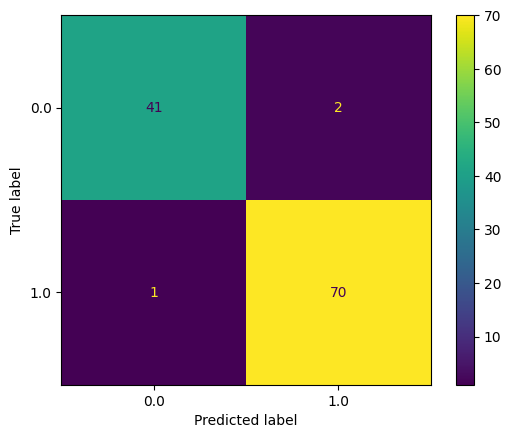

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay as CM
import numpy as np

# Convert tensors to NumPy arrays
y_test_np = y_test.numpy()
y_pred_np = y_pred.numpy()

CM.from_predictions(y_test_np, y_pred_np)

This is the same code as AiP (basically) and we can see it gives us good results!

Overall we should be able to see this is a very similar process. However, unlike in AiP/sklearn, this is a much more manual process in places. This means the code is a little more hardwork, but gives us much more flexibility to define the model how we want. For logistic regression we are just following the standard template of the algorithm. However, as we move on into deep learning we will see this flexibility is basically the job ... the key hyperparameters are how we define these different layers and transformations.